In [1]:
import matplotlib.pyplot as plt
import numpy as np

def forward(x, idx_data, time_data):
    return np.interp(x, idx_data, time_data)

def reverse(x, idx_data, time_data):
    return np.interp(x, time_data, idx_data)

776


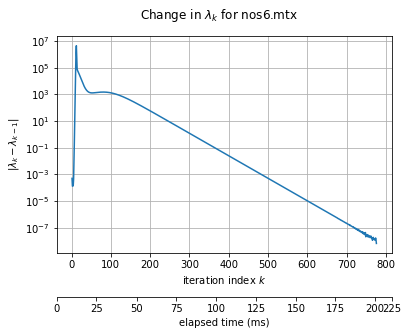

In [2]:
from data import power_nos6
actual = power_nos6.power[-1]['e']
t0 = power_nos6.power[1]['t']
t = np.cumsum([info['t'] for info in power_nos6.power[1:]])*1.0e-3
print(len(t))
diff = [info['err'] for info in power_nos6.power[1:]]
idx = np.arange(1,len(t)+1)
fig, ax = plt.subplots()
fig.suptitle("Change in $\lambda_k$ for nos6.mtx")
ax.grid()
ax.semilogy(idx, diff)
ax.set_xlabel("iteration index $k$")
ax.set_ylabel("$|\lambda_k-\lambda_{k-1}|$")
time_axis = ax.secondary_xaxis(location=-0.2, functions=(lambda x: forward(x, idx, t), lambda x: reverse(x, idx, t)))
time_axis.set_xlabel("elapsed time (ms)")
fig.savefig("gfx/proj3_nos6_power.eps", bbox_inches='tight', format="eps")

2144


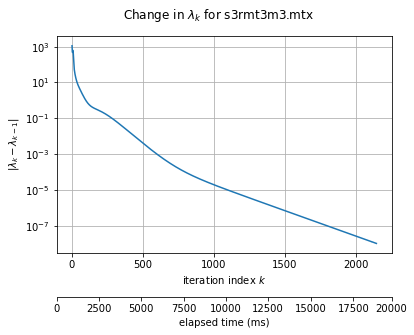

In [3]:
from data import power_s3r
actual = power_s3r.power[-1]['e']
t = np.cumsum([info['t'] for info in power_s3r.power[1:]])*1.0e-3
print(len(t))
diff = [info['err'] for info in power_s3r.power[1:]]
fig, ax = plt.subplots()
fig.suptitle("Change in $\lambda_k$ for s3rmt3m3.mtx")
ax.set_ylabel("$|\lambda_{k} - \lambda_{k-1}|$")
ax.grid()
idx = np.arange(1,len(t)+1)
ax.semilogy(idx, diff)
ax.set_xlabel("iteration index $k$")
time_axis = ax.secondary_xaxis(location=-0.2, functions=(lambda x: forward(x, idx, t), lambda x: reverse(x, idx, t)))
time_axis.set_xlabel("elapsed time (ms)")
fig.savefig("gfx/proj3_s3r_power.eps", bbox_inches='tight', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


313.096 & 10.423
519.889 & 20.682000000000002
787.905 & 78.09
1036.404 & 102.441
2096.6820000000002 & 202.286


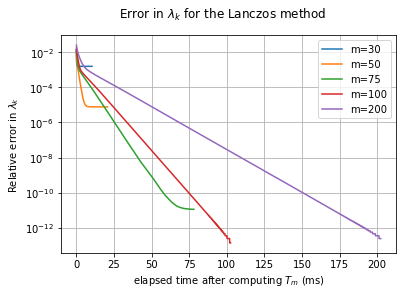

In [3]:
from data import lanczos_30, lanczos_50, lanczos_75, lanczos_100, lanczos_200
results = [lanczos_30, lanczos_50, lanczos_75, lanczos_100, lanczos_200]
actual = 9.5986080894852857e+03

fig, ax = plt.subplots()
fig.suptitle("Error in $\lambda_k$ for the Lanczos method")
ax.set_ylabel("Relative error in $\lambda_k$")
ax.set_xlabel("elapsed time after computing $T_m$ (ms)")
ax.grid()

for (m, result) in zip([30,50,75,100,200], results):
    basis_time = np.cumsum([info['t'] for info in result.lanczos])
    t = (np.cumsum([info['t'] for info in result.power[1:]]))*1.0e-3 # convert from us to ms
    err = [abs(info['e']-actual)/actual for info in result.power[1:]]
    print(f"{basis_time[-1]*1.0e-3} & {t[-1]}")
    ax.semilogy(t, err, label=f"m={m}")
_ = ax.legend()

fig.savefig("gfx/proj3_lanczos_compare.eps", format="eps")